In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


In [2]:
x = np.array([2, 4, 6, 8])
y = np.array([3, 7, 5, 10])

print("="*70)
print("LINEAR REGRESSION ANALYSIS")
print("="*70)


LINEAR REGRESSION ANALYSIS


In [3]:
print("\nOriginal Data:")
data_table = [[x[i], y[i]] for i in range(len(x))]
print(tabulate(data_table, headers=['x', 'y'], tablefmt='grid'))



Original Data:
+-----+-----+
|   x |   y |
+=====+=====+
|   2 |   3 |
+-----+-----+
|   4 |   7 |
+-----+-----+
|   6 |   5 |
+-----+-----+
|   8 |  10 |
+-----+-----+


In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)

print(f"\nStep 1: Calculate Means")
print(f"  x̄ = {x_mean}")
print(f"  ȳ = {y_mean}")


Step 1: Calculate Means
  x̄ = 5.0
  ȳ = 6.25


In [7]:
print(f"\nStep 2: Calculate Slope (m)")

calc_table = []
sum_xy_dev = 0
sum_x_dev_sq = 0

for i in range(len(x)):
    x_dev = x[i] - x_mean
    y_dev = y[i] - y_mean
    xy_dev = x_dev * y_dev
    x_dev_sq = x_dev ** 2
    
    sum_xy_dev += xy_dev
    sum_x_dev_sq += x_dev_sq
    
    calc_table.append([
        x[i], 
        y[i], 
        f"{x_dev:.2f}", 
        f"{y_dev:.2f}", 
        f"{xy_dev:.2f}", 
        f"{x_dev_sq:.2f}"
    ])

calc_table.append(['', '', '', 'Sum →', f"{sum_xy_dev:.2f}", f"{sum_x_dev_sq:.2f}"])

headers = ['xi', 'yi', '(xi - x̄)', '(yi - ȳ)', '(xi - x̄)(yi - ȳ)', '(xi - x̄)²']
print(tabulate(calc_table, headers=headers, tablefmt='grid'))

m = sum_xy_dev / sum_x_dev_sq
print(f"\n  m = Σ[(xi - x̄)(yi - ȳ)] / Σ[(xi - x̄)²]")
print(f"  m = {sum_xy_dev} / {sum_x_dev_sq}")
print(f"  m = {m:.4f}")



Step 2: Calculate Slope (m)
+------+------+------------+------------+--------------------+-------------+
| xi   | yi   | (xi - x̄)   | (yi - ȳ)   |   (xi - x̄)(yi - ȳ) |   (xi - x̄)² |
+======+======+============+============+====================+=============+
| 2    | 3    | -3.00      | -3.25      |               9.75 |           9 |
+------+------+------------+------------+--------------------+-------------+
| 4    | 7    | -1.00      | 0.75       |              -0.75 |           1 |
+------+------+------------+------------+--------------------+-------------+
| 6    | 5    | 1.00       | -1.25      |              -1.25 |           1 |
+------+------+------------+------------+--------------------+-------------+
| 8    | 10   | 3.00       | 3.75       |              11.25 |           9 |
+------+------+------------+------------+--------------------+-------------+
|      |      |            | Sum →      |              19    |          20 |
+------+------+------------+------------+---

In [8]:
c = y_mean - m * x_mean
print(f"\nStep 3: Calculate Y-Intercept (c)")
print(f"  c = ȳ - m·x̄")
print(f"  c = {y_mean} - {m:.4f} × {x_mean}")
print(f"  c = {c:.4f}")

# Linear regression equation
print("\n" + "="*70)
print(f"LINEAR REGRESSION EQUATION: y = {m:.4f}x + {c:.4f}")
print("="*70)


Step 3: Calculate Y-Intercept (c)
  c = ȳ - m·x̄
  c = 6.25 - 0.9500 × 5.0
  c = 1.5000

LINEAR REGRESSION EQUATION: y = 0.9500x + 1.5000


In [9]:
print(f"\nStep 4: Calculate R² (Coefficient of Determination)")

pred_table = []
ss_res = 0
ss_tot = 0

for i in range(len(x)):
    y_pred = m * x[i] + c
    residual_sq = (y[i] - y_pred) ** 2
    total_sq = (y[i] - y_mean) ** 2
    
    ss_res += residual_sq
    ss_tot += total_sq
    
    pred_table.append([
        x[i],
        y[i],
        f"{y_pred:.4f}",
        f"{residual_sq:.4f}",
        f"{total_sq:.4f}"
    ])

pred_table.append(['', '', 'Sum →', f"{ss_res:.4f}", f"{ss_tot:.4f}"])

headers = ['xi', 'yi', 'ŷi (predicted)', '(yi - ŷi)²', '(yi - ȳ)²']
print(tabulate(pred_table, headers=headers, tablefmt='grid'))

r_squared = 1 - (ss_res / ss_tot)

print(f"\n  SSres (Sum of Squared Residuals) = {ss_res:.4f}")
print(f"  SStot (Total Sum of Squares) = {ss_tot:.4f}")
print(f"\n  R² = 1 - (SSres / SStot)")
print(f"  R² = 1 - ({ss_res:.4f} / {ss_tot:.4f})")
print(f"  R² = {r_squared:.4f}")

print("\n" + "="*70)
print(f"FINAL RESULTS:")
print(f"  • Linear Regression Equation: y = {m:.4f}x + {c:.4f}")
print(f"  • R² = {r_squared:.4f} ({r_squared*100:.2f}%)")
print(f"  • This means {r_squared*100:.2f}% of variance in y is explained by x")
print("="*70)



Step 4: Calculate R² (Coefficient of Determination)
+------+------+------------------+--------------+-------------+
| xi   | yi   | ŷi (predicted)   |   (yi - ŷi)² |   (yi - ȳ)² |
+======+======+==================+==============+=============+
| 2    | 3    | 3.4000           |         0.16 |     10.5625 |
+------+------+------------------+--------------+-------------+
| 4    | 7    | 5.3000           |         2.89 |      0.5625 |
+------+------+------------------+--------------+-------------+
| 6    | 5    | 7.2000           |         4.84 |      1.5625 |
+------+------+------------------+--------------+-------------+
| 8    | 10   | 9.1000           |         0.81 |     14.0625 |
+------+------+------------------+--------------+-------------+
|      |      | Sum →            |         8.7  |     26.75   |
+------+------+------------------+--------------+-------------+

  SSres (Sum of Squared Residuals) = 8.7000
  SStot (Total Sum of Squares) = 26.7500

  R² = 1 - (SSres / SStot)
 

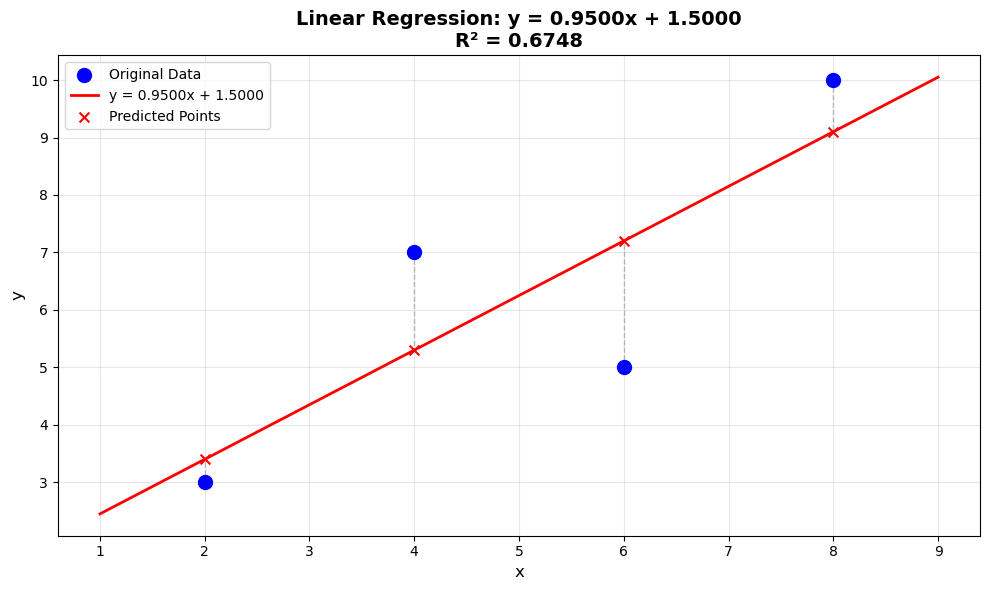

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='blue', s=100, label='Original Data', zorder=3)

x_line = np.linspace(min(x) - 1, max(x) + 1, 100)
y_line = m * x_line + c
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'y = {m:.4f}x + {c:.4f}', zorder=2)

y_pred_all = m * x + c
plt.scatter(x, y_pred_all, color='red', s=50, marker='x', label='Predicted Points', zorder=3)

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred_all[i]], 'gray', linestyle='--', linewidth=1, alpha=0.5)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(f'Linear Regression: y = {m:.4f}x + {c:.4f}\nR² = {r_squared:.4f}', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
